In [1]:
import pyemma
pyemma.__version__
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pyemma.coordinates as coor
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dir = '/sc/orga/projects/filizm02a/work/ion_MOR/inactive/unbiased_sampling/no_lipid_water'
topfile = dir+'/no_lipid_water.pdb'

In [4]:
from glob import glob
traj_list = [dir+'/md-%d-no_lipid_water.dcd'%i for i in range(159)]

In [5]:
def splitbox(trajs, box,cutoff=100):
    original_lenghts = [len(traj) for traj in trajs]
    original_number = len(trajs)
    original_desc = ( np.array(original_lenghts).sum(), original_number)
    print("Original: %d frames in %d trajectories"% original_desc)
    trajs2=[]
    for traj in trajs:
        diff = traj[1:]-traj[:-1]
        bkpts = np.where(abs(diff)>=box)[0]
        bkpts = np.concatenate([
           np.array([0]),
           bkpts+1,
           np.array([len(traj)])])
        for i,b in enumerate(bkpts[:-1]):
            if len(traj[b:bkpts[i+1]])>cutoff:
                 trajs2.append(traj[b:bkpts[i+1]])
    new_lenghts = [len(traj) for traj in trajs2]
    new_number = len(trajs2)
    new_desc = ( np.array(new_lenghts).sum(), new_number)
    print("New: %d frames in %d trajectories"% new_desc)
    return trajs2

In [ ]:
split_traj = splitbox(traj_list,100)

In [9]:
# distance between all atoms (including 1 Na+ and protein without H)
feat_Ca = coor.featurizer(topfile)
# just use all xyz-coordinates
#feat_Ca.add_all()
feat_Ca.add_distances([[0 , 4712], [4 , 4712], [6 , 4712], [9 , 4712], [12 , 4712], [13 , 4712], [17 , 4712], [18 , 4712], [19 , 4712], [21 , 4712], [23 , 4712], [25 , 4712], [29 , 4712], [33 , 4712], [34 , 4712], [35 , 4712], [37 , 4712], [39 , 4712], [41 , 4712], [43 , 4712], [47 , 4712], [48 , 4712], [49 , 4712], [51 , 4712], [53 , 4712], [57 , 4712], [58 , 4712], [59 , 4712], [61 , 4712], [63 , 4712], [65 , 4712], [69 , 4712], [72 , 4712], [76 , 4712], [77 , 4712], [78 , 4712], [80 , 4712], [82 , 4712], [84 , 4712], [86 , 4712], [90 , 4712], [91 , 4712], [92 , 4712], [94 , 4712], [96 , 4712], [98 , 4712], [102 , 4712], [105 , 4712], [109 , 4712], [110 , 4712], [111 , 4712], [113 , 4712], [115 , 4712], [118 , 4712], [121 , 4712], [122 , 4712], [126 , 4712], [127 , 4712], [128 , 4712], [130 , 4712], [132 , 4712], [136 , 4712], [137 , 4712], [138 , 4712], [140 , 4712], [142 , 4712], [145 , 4712], [147 , 4712], [151 , 4712], [155 , 4712], [156 , 4712], [157 , 4712], [159 , 4712], [161 , 4712], [164 , 4712], [165 , 4712], [167 , 4712], [169 , 4712], [170 , 4712], [172 , 4712], [174 , 4712], [176 , 4712], [177 , 4712], [178 , 4712], [180 , 4712], [182 , 4712], [185 , 4712], [187 , 4712], [188 , 4712], [189 , 4712], [191 , 4712], [193 , 4712], [195 , 4712], [199 , 4712], [202 , 4712], [206 , 4712], [207 , 4712], [208 , 4712], [210 , 4712], [212 , 4712], [214 , 4712], [218 , 4712], [222 , 4712], [223 , 4712], [224 , 4712], [226 , 4712], [228 , 4712], [231 , 4712], [233 , 4712], [234 , 4712], [235 , 4712], [237 , 4712], [239 , 4712], [241 , 4712], [245 , 4712], [249 , 4712], [250 , 4712], [251 , 4712], [253 , 4712], [255 , 4712], [257 , 4712], [261 , 4712], [265 , 4712], [266 , 4712], [267 , 4712], [269 , 4712], [272 , 4712], [273 , 4712], [274 , 4712], [276 , 4712], [278 , 4712], [281 , 4712], [283 , 4712], [287 , 4712], [291 , 4712], [292 , 4712], [293 , 4712], [295 , 4712], [297 , 4712], [300 , 4712], [301 , 4712], [303 , 4712], [305 , 4712], [307 , 4712], [309 , 4712], [311 , 4712], [312 , 4712], [313 , 4712], [315 , 4712], [318 , 4712], [319 , 4712], [320 , 4712], [322 , 4712], [324 , 4712], [327 , 4712], [328 , 4712], [329 , 4712], [332 , 4712], [333 , 4712], [334 , 4712], [336 , 4712], [338 , 4712], [341 , 4712], [342 , 4712], [344 , 4712], [346 , 4712], [348 , 4712], [350 , 4712], [352 , 4712], [353 , 4712], [354 , 4712], [356 , 4712], [358 , 4712], [361 , 4712], [363 , 4712], [367 , 4712], [371 , 4712], [372 , 4712], [373 , 4712], [375 , 4712], [377 , 4712], [379 , 4712], [383 , 4712], [387 , 4712], [388 , 4712], [389 , 4712], [391 , 4712], [393 , 4712], [396 , 4712], [399 , 4712], [400 , 4712], [404 , 4712], [405 , 4712], [406 , 4712], [408 , 4712], [410 , 4712], [413 , 4712], [414 , 4712], [416 , 4712], [418 , 4712], [419 , 4712], [421 , 4712], [423 , 4712], [425 , 4712], [426 , 4712], [427 , 4712], [429 , 4712], [431 , 4712], [433 , 4712], [437 , 4712], [441 , 4712], [442 , 4712], [443 , 4712], [445 , 4712], [447 , 4712], [449 , 4712], [453 , 4712], [456 , 4712], [460 , 4712], [461 , 4712], [462 , 4712], [464 , 4712], [466 , 4712], [468 , 4712], [472 , 4712], [476 , 4712], [477 , 4712], [478 , 4712], [480 , 4712], [482 , 4712], [485 , 4712], [488 , 4712], [491 , 4712], [493 , 4712], [494 , 4712], [497 , 4712], [500 , 4712], [501 , 4712], [502 , 4712], [504 , 4712], [506 , 4712], [509 , 4712], [510 , 4712], [512 , 4712], [514 , 4712], [515 , 4712], [517 , 4712], [519 , 4712], [521 , 4712], [522 , 4712], [523 , 4712], [525 , 4712], [527 , 4712], [529 , 4712], [531 , 4712], [535 , 4712], [536 , 4712], [537 , 4712], [539 , 4712], [541 , 4712], [544 , 4712], [547 , 4712], [550 , 4712], [553 , 4712], [557 , 4712], [558 , 4712], [559 , 4712], [561 , 4712], [563 , 4712], [566 , 4712], [569 , 4712], [570 , 4712], [574 , 4712], [575 , 4712], [576 , 4712], [578 , 4712], [580 , 4712], [583 , 4712], [586 , 4712], [589 , 4712], [592 , 4712], [596 , 4712], [597 , 4712], [598 , 4712], [600 , 4712], [602 , 4712], [604 , 4712], [606 , 4712], [610 , 4712], [611 , 4712], [612 , 4712], [614 , 4712], [616 , 4712], [620 , 4712], [621 , 4712], [622 , 4712], [624 , 4712], [626 , 4712], [628 , 4712], [630 , 4712], [634 , 4712], [635 , 4712], [636 , 4712], [638 , 4712], [640 , 4712], [643 , 4712], [644 , 4712], [645 , 4712], [648 , 4712], [649 , 4712], [650 , 4712], [652 , 4712], [654 , 4712], [656 , 4712], [660 , 4712], [663 , 4712], [667 , 4712], [668 , 4712], [669 , 4712], [671 , 4712], [673 , 4712], [676 , 4712], [677 , 4712], [679 , 4712], [681 , 4712], [682 , 4712], [684 , 4712], [686 , 4712], [688 , 4712], [689 , 4712], [690 , 4712], [692 , 4712], [694 , 4712], [696 , 4712], [700 , 4712], [703 , 4712], [707 , 4712], [708 , 4712], [709 , 4712], [711 , 4712], [713 , 4712], [716 , 4712], [717 , 4712], [719 , 4712], [721 , 4712], [723 , 4712], [725 , 4712], [727 , 4712], [728 , 4712], [729 , 4712], [731 , 4712], [733 , 4712], [736 , 4712], [737 , 4712], [738 , 4712], [741 , 4712], [742 , 4712], [743 , 4712], [745 , 4712], [747 , 4712], [750 , 4712], [752 , 4712], [756 , 4712], [760 , 4712], [761 , 4712], [762 , 4712], [764 , 4712], [766 , 4712], [770 , 4712], [771 , 4712], [772 , 4712], [774 , 4712], [776 , 4712], [779 , 4712], [781 , 4712], [785 , 4712], [789 , 4712], [790 , 4712], [791 , 4712], [793 , 4712], [795 , 4712], [799 , 4712], [800 , 4712], [801 , 4712], [803 , 4712], [805 , 4712], [808 , 4712], [809 , 4712], [810 , 4712], [811 , 4712], [812 , 4712], [813 , 4712], [815 , 4712], [817 , 4712], [821 , 4712], [822 , 4712], [823 , 4712], [825 , 4712], [827 , 4712], [830 , 4712], [832 , 4712], [836 , 4712], [840 , 4712], [841 , 4712], [842 , 4712], [844 , 4712], [846 , 4712], [850 , 4712], [851 , 4712], [852 , 4712], [854 , 4712], [856 , 4712], [858 , 4712], [860 , 4712], [864 , 4712], [865 , 4712], [866 , 4712], [868 , 4712], [870 , 4712], [873 , 4712], [875 , 4712], [876 , 4712], [877 , 4712], [879 , 4712], [881 , 4712], [883 , 4712], [885 , 4712], [889 , 4712], [890 , 4712], [891 , 4712], [893 , 4712], [895 , 4712], [898 , 4712], [900 , 4712], [904 , 4712], [908 , 4712], [909 , 4712], [910 , 4712], [911 , 4712], [914 , 4712], [916 , 4712], [919 , 4712], [922 , 4712], [923 , 4712], [924 , 4712], [926 , 4712], [928 , 4712], [931 , 4712], [932 , 4712], [934 , 4712], [936 , 4712], [938 , 4712], [940 , 4712], [942 , 4712], [943 , 4712], [944 , 4712], [946 , 4712], [948 , 4712], [951 , 4712], [954 , 4712], [955 , 4712], [956 , 4712], [959 , 4712], [960 , 4712], [961 , 4712], [963 , 4712], [965 , 4712], [968 , 4712], [970 , 4712], [971 , 4712], [972 , 4712], [974 , 4712], [976 , 4712], [978 , 4712], [982 , 4712], [986 , 4712], [987 , 4712], [988 , 4712], [990 , 4712], [992 , 4712], [995 , 4712], [996 , 4712], [997 , 4712], [1000, 4712], [1001, 4712], [1002, 4712], [1004, 4712], [1006, 4712], [1009, 4712], [1010, 4712], [1012, 4712], [1014, 4712], [1015, 4712], [1017, 4712], [1019, 4712], [1021, 4712], [1022, 4712], [1023, 4712], [1025, 4712], [1027, 4712], [1030, 4712], [1032, 4712], [1036, 4712], [1040, 4712], [1041, 4712], [1042, 4712], [1044, 4712], [1046, 4712], [1049, 4712], [1052, 4712], [1053, 4712], [1057, 4712], [1058, 4712], [1059, 4712], [1061, 4712], [1064, 4712], [1065, 4712], [1066, 4712], [1068, 4712], [1070, 4712], [1072, 4712], [1074, 4712], [1078, 4712], [1079, 4712], [1080, 4712], [1082, 4712], [1084, 4712], [1087, 4712], [1088, 4712], [1090, 4712], [1092, 4712], [1093, 4712], [1094, 4712], [1096, 4712], [1098, 4712], [1100, 4712], [1102, 4712], [1103, 4712], [1104, 4712], [1105, 4712], [1108, 4712], [1110, 4712], [1113, 4712], [1116, 4712], [1117, 4712], [1118, 4712], [1120, 4712], [1122, 4712], [1125, 4712], [1126, 4712], [1128, 4712], [1130, 4712], [1132, 4712], [1134, 4712], [1136, 4712], [1137, 4712], [1138, 4712], [1140, 4712], [1143, 4712], [1144, 4712], [1145, 4712], [1147, 4712], [1149, 4712], [1152, 4712], [1153, 4712], [1154, 4712], [1157, 4712], [1158, 4712], [1159, 4712], [1161, 4712], [1163, 4712], [1165, 4712], [1169, 4712], [1172, 4712], [1176, 4712], [1177, 4712], [1178, 4712], [1180, 4712], [1182, 4712], [1185, 4712], [1187, 4712], [1191, 4712], [1195, 4712], [1196, 4712], [1197, 4712], [1199, 4712], [1201, 4712], [1204, 4712], [1206, 4712], [1207, 4712], [1208, 4712], [1210, 4712], [1212, 4712], [1215, 4712], [1218, 4712], [1221, 4712], [1224, 4712], [1228, 4712], [1229, 4712], [1230, 4712], [1232, 4712], [1234, 4712], [1236, 4712], [1240, 4712], [1243, 4712], [1247, 4712], [1248, 4712], [1249, 4712], [1251, 4712], [1253, 4712], [1255, 4712], [1259, 4712], [1263, 4712], [1264, 4712], [1265, 4712], [1267, 4712], [1269, 4712], [1271, 4712], [1275, 4712], [1278, 4712], [1282, 4712], [1283, 4712], [1284, 4712], [1286, 4712], [1288, 4712], [1291, 4712], [1293, 4712], [1294, 4712], [1295, 4712], [1297, 4712], [1299, 4712], [1301, 4712], [1305, 4712], [1308, 4712], [1312, 4712], [1313, 4712], [1314, 4712], [1316, 4712], [1318, 4712], [1321, 4712], [1322, 4712], [1323, 4712], [1324, 4712], [1325, 4712], [1326, 4712], [1328, 4712], [1330, 4712], [1333, 4712], [1334, 4712], [1336, 4712], [1338, 4712], [1339, 4712], [1341, 4712], [1343, 4712], [1345, 4712], [1346, 4712], [1347, 4712], [1349, 4712], [1351, 4712], [1354, 4712], [1355, 4712], [1357, 4712], [1359, 4712], [1360, 4712], [1362, 4712], [1364, 4712], [1366, 4712], [1367, 4712], [1368, 4712], [1370, 4712], [1372, 4712], [1375, 4712], [1376, 4712], [1377, 4712], [1380, 4712], [1381, 4712], [1382, 4712], [1384, 4712], [1386, 4712], [1389, 4712], [1392, 4712], [1393, 4712], [1397, 4712], [1398, 4712], [1399, 4712], [1401, 4712], [1403, 4712], [1406, 4712], [1407, 4712], [1409, 4712], [1411, 4712], [1413, 4712], [1415, 4712], [1417, 4712], [1418, 4712], [1419, 4712], [1421, 4712], [1423, 4712], [1425, 4712], [1427, 4712], [1431, 4712], [1432, 4712], [1433, 4712], [1435, 4712], [1437, 4712], [1440, 4712], [1442, 4712], [1443, 4712], [1444, 4712], [1446, 4712], [1448, 4712], [1450, 4712], [1454, 4712], [1457, 4712], [1461, 4712], [1462, 4712], [1463, 4712], [1465, 4712], [1467, 4712], [1470, 4712], [1471, 4712], [1473, 4712], [1475, 4712], [1477, 4712], [1479, 4712], [1481, 4712], [1482, 4712], [1483, 4712], [1485, 4712], [1487, 4712], [1489, 4712], [1491, 4712], [1495, 4712], [1496, 4712], [1497, 4712], [1499, 4712], [1501, 4712], [1504, 4712], [1506, 4712], [1510, 4712], [1514, 4712], [1515, 4712], [1516, 4712], [1518, 4712], [1520, 4712], [1523, 4712], [1525, 4712], [1526, 4712], [1527, 4712], [1529, 4712], [1531, 4712], [1533, 4712], [1535, 4712], [1539, 4712], [1540, 4712], [1541, 4712], [1543, 4712], [1545, 4712], [1548, 4712], [1551, 4712], [1552, 4712], [1556, 4712], [1557, 4712], [1558, 4712], [1560, 4712], [1562, 4712], [1565, 4712], [1567, 4712], [1568, 4712], [1569, 4712], [1571, 4712], [1573, 4712], [1575, 4712], [1579, 4712], [1583, 4712], [1584, 4712], [1585, 4712], [1587, 4712], [1589, 4712], [1592, 4712], [1593, 4712], [1594, 4712], [1595, 4712], [1596, 4712], [1597, 4712], [1599, 4712], [1601, 4712], [1604, 4712], [1607, 4712], [1610, 4712], [1612, 4712], [1613, 4712], [1616, 4712], [1619, 4712], [1620, 4712], [1621, 4712], [1623, 4712], [1625, 4712], [1628, 4712], [1629, 4712], [1631, 4712], [1633, 4712], [1634, 4712], [1636, 4712], [1638, 4712], [1640, 4712], [1641, 4712], [1642, 4712], [1644, 4712], [1646, 4712], [1648, 4712], [1652, 4712], [1655, 4712], [1659, 4712], [1660, 4712], [1661, 4712], [1663, 4712], [1665, 4712], [1669, 4712], [1670, 4712], [1671, 4712], [1673, 4712], [1675, 4712], [1677, 4712], [1681, 4712], [1685, 4712], [1686, 4712], [1687, 4712], [1689, 4712], [1691, 4712], [1694, 4712], [1696, 4712], [1697, 4712], [1698, 4712], [1700, 4712], [1702, 4712], [1705, 4712], [1707, 4712], [1708, 4712], [1710, 4712], [1711, 4712], [1713, 4712], [1714, 4712], [1715, 4712], [1716, 4712], [1719, 4712], [1721, 4712], [1724, 4712], [1727, 4712], [1728, 4712], [1729, 4712], [1731, 4712], [1733, 4712], [1735, 4712], [1739, 4712], [1743, 4712], [1744, 4712], [1745, 4712], [1747, 4712], [1749, 4712], [1752, 4712], [1755, 4712], [1758, 4712], [1761, 4712], [1765, 4712], [1766, 4712], [1767, 4712], [1769, 4712], [1771, 4712], [1775, 4712], [1776, 4712], [1777, 4712], [1779, 4712], [1781, 4712], [1784, 4712], [1786, 4712], [1790, 4712], [1794, 4712], [1795, 4712], [1796, 4712], [1798, 4712], [1800, 4712], [1803, 4712], [1804, 4712], [1805, 4712], [1806, 4712], [1807, 4712], [1808, 4712], [1810, 4712], [1812, 4712], [1815, 4712], [1816, 4712], [1818, 4712], [1820, 4712], [1822, 4712], [1824, 4712], [1826, 4712], [1827, 4712], [1828, 4712], [1830, 4712], [1832, 4712], [1835, 4712], [1838, 4712], [1841, 4712], [1843, 4712], [1844, 4712], [1847, 4712], [1850, 4712], [1851, 4712], [1852, 4712], [1854, 4712], [1856, 4712], [1858, 4712], [1860, 4712], [1864, 4712], [1865, 4712], [1866, 4712], [1867, 4712], [1870, 4712], [1872, 4712], [1875, 4712], [1878, 4712], [1879, 4712], [1880, 4712], [1882, 4712], [1884, 4712], [1887, 4712], [1890, 4712], [1893, 4712], [1895, 4712], [1896, 4712], [1899, 4712], [1902, 4712], [1903, 4712], [1904, 4712], [1906, 4712], [1908, 4712], [1911, 4712], [1912, 4712], [1913, 4712], [1916, 4712], [1917, 4712], [1918, 4712], [1920, 4712], [1922, 4712], [1926, 4712], [1927, 4712], [1928, 4712], [1930, 4712], [1932, 4712], [1935, 4712], [1938, 4712], [1941, 4712], [1944, 4712], [1948, 4712], [1949, 4712], [1950, 4712], [1952, 4712], [1954, 4712], [1956, 4712], [1960, 4712], [1963, 4712], [1967, 4712], [1968, 4712], [1969, 4712], [1971, 4712], [1973, 4712], [1975, 4712], [1979, 4712], [1983, 4712], [1984, 4712], [1985, 4712], [1987, 4712], [1989, 4712], [1992, 4712], [1993, 4712], [1994, 4712], [1997, 4712], [1998, 4712], [1999, 4712], [2001, 4712], [2003, 4712], [2005, 4712], [2009, 4712], [2013, 4712], [2014, 4712], [2015, 4712], [2017, 4712], [2019, 4712], [2022, 4712], [2024, 4712], [2025, 4712], [2026, 4712], [2028, 4712], [2030, 4712], [2033, 4712], [2034, 4712], [2035, 4712], [2038, 4712], [2039, 4712], [2040, 4712], [2042, 4712], [2044, 4712], [2047, 4712], [2048, 4712], [2050, 4712], [2052, 4712], [2053, 4712], [2054, 4712], [2056, 4712], [2058, 4712], [2060, 4712], [2062, 4712], [2063, 4712], [2064, 4712], [2066, 4712], [2068, 4712], [2070, 4712], [2074, 4712], [2077, 4712], [2081, 4712], [2082, 4712], [2083, 4712], [2085, 4712], [2087, 4712], [2090, 4712], [2092, 4712], [2096, 4712], [2100, 4712], [2101, 4712], [2102, 4712], [2104, 4712], [2106, 4712], [2109, 4712], [2111, 4712], [2112, 4712], [2113, 4712], [2115, 4712], [2117, 4712], [2120, 4712], [2122, 4712], [2123, 4712], [2124, 4712], [2126, 4712], [2128, 4712], [2132, 4712], [2133, 4712], [2134, 4712], [2136, 4712], [2138, 4712], [2140, 4712], [2144, 4712], [2147, 4712], [2151, 4712], [2152, 4712], [2153, 4712], [2155, 4712], [2158, 4712], [2159, 4712], [2160, 4712], [2162, 4712], [2164, 4712], [2167, 4712], [2169, 4712], [2173, 4712], [2177, 4712], [2178, 4712], [2179, 4712], [2180, 4712], [2183, 4712], [2185, 4712], [2188, 4712], [2191, 4712], [2192, 4712], [2193, 4712], [2195, 4712], [2197, 4712], [2199, 4712], [2203, 4712], [2207, 4712], [2208, 4712], [2209, 4712], [2211, 4712], [2213, 4712], [2216, 4712], [2219, 4712], [2220, 4712], [2224, 4712], [2225, 4712], [2226, 4712], [2228, 4712], [2230, 4712], [2233, 4712], [2234, 4712], [2236, 4712], [2238, 4712], [2240, 4712], [2242, 4712], [2244, 4712], [2245, 4712], [2246, 4712], [2248, 4712], [2250, 4712], [2253, 4712], [2256, 4712], [2257, 4712], [2261, 4712], [2262, 4712], [2263, 4712], [2265, 4712], [2267, 4712], [2271, 4712], [2272, 4712], [2273, 4712], [2275, 4712], [2277, 4712], [2279, 4712], [2281, 4712], [2285, 4712], [2286, 4712], [2287, 4712], [2289, 4712], [2291, 4712], [2293, 4712], [2295, 4712], [2299, 4712], [2300, 4712], [2301, 4712], [2303, 4712], [2305, 4712], [2308, 4712], [2311, 4712], [2314, 4712], [2317, 4712], [2321, 4712], [2322, 4712], [2323, 4712], [2325, 4712], [2327, 4712], [2330, 4712], [2331, 4712], [2333, 4712], [2335, 4712], [2336, 4712], [2338, 4712], [2340, 4712], [2342, 4712], [2343, 4712], [2344, 4712], [2346, 4712], [2348, 4712], [2351, 4712], [2354, 4712], [2357, 4712], [2359, 4712], [2360, 4712], [2363, 4712], [2366, 4712], [2367, 4712], [2368, 4712], [2370, 4712], [2372, 4712], [2375, 4712], [2378, 4712], [2379, 4712], [2380, 4712], [2383, 4712], [2384, 4712], [2385, 4712], [2387, 4712], [2390, 4712], [2391, 4712], [2392, 4712], [2394, 4712], [2396, 4712], [2399, 4712], [2401, 4712], [2402, 4712], [2403, 4712], [2405, 4712], [2407, 4712], [2409, 4712], [2413, 4712], [2416, 4712], [2420, 4712], [2421, 4712], [2422, 4712], [2424, 4712], [2426, 4712], [2429, 4712], [2430, 4712], [2431, 4712], [2432, 4712], [2433, 4712], [2434, 4712], [2436, 4712], [2438, 4712], [2441, 4712], [2443, 4712], [2444, 4712], [2445, 4712], [2447, 4712], [2449, 4712], [2451, 4712], [2453, 4712], [2457, 4712], [2458, 4712], [2459, 4712], [2461, 4712], [2463, 4712], [2466, 4712], [2468, 4712], [2472, 4712], [2476, 4712], [2477, 4712], [2478, 4712], [2480, 4712], [2482, 4712], [2484, 4712], [2486, 4712], [2490, 4712], [2491, 4712], [2492, 4712], [2494, 4712], [2496, 4712], [2499, 4712], [2500, 4712], [2502, 4712], [2504, 4712], [2506, 4712], [2508, 4712], [2510, 4712], [2511, 4712], [2512, 4712], [2514, 4712], [2516, 4712], [2519, 4712], [2521, 4712], [2522, 4712], [2523, 4712], [2525, 4712], [2527, 4712], [2530, 4712], [2532, 4712], [2533, 4712], [2535, 4712], [2536, 4712], [2538, 4712], [2539, 4712], [2540, 4712], [2541, 4712], [2544, 4712], [2546, 4712], [2549, 4712], [2552, 4712], [2553, 4712], [2554, 4712], [2556, 4712], [2558, 4712], [2560, 4712], [2562, 4712], [2566, 4712], [2567, 4712], [2568, 4712], [2570, 4712], [2572, 4712], [2575, 4712], [2576, 4712], [2578, 4712], [2580, 4712], [2581, 4712], [2582, 4712], [2584, 4712], [2586, 4712], [2588, 4712], [2590, 4712], [2591, 4712], [2592, 4712], [2594, 4712], [2596, 4712], [2599, 4712], [2600, 4712], [2602, 4712], [2604, 4712], [2605, 4712], [2607, 4712], [2609, 4712], [2611, 4712], [2612, 4712], [2613, 4712], [2615, 4712], [2617, 4712], [2620, 4712], [2621, 4712], [2623, 4712], [2625, 4712], [2626, 4712], [2627, 4712], [2629, 4712], [2631, 4712], [2633, 4712], [2635, 4712], [2636, 4712], [2637, 4712], [2639, 4712], [2641, 4712], [2644, 4712], [2647, 4712], [2648, 4712], [2649, 4712], [2650, 4712], [2651, 4712], [2652, 4712], [2654, 4712], [2656, 4712], [2659, 4712], [2660, 4712], [2661, 4712], [2664, 4712], [2665, 4712], [2666, 4712], [2668, 4712], [2670, 4712], [2673, 4712], [2675, 4712], [2679, 4712], [2683, 4712], [2684, 4712], [2685, 4712], [2687, 4712], [2689, 4712], [2692, 4712], [2694, 4712], [2698, 4712], [2702, 4712], [2703, 4712], [2704, 4712], [2706, 4712], [2708, 4712], [2711, 4712], [2714, 4712], [2717, 4712], [2720, 4712], [2724, 4712], [2725, 4712], [2726, 4712], [2728, 4712], [2730, 4712], [2732, 4712], [2736, 4712], [2739, 4712], [2743, 4712], [2744, 4712], [2745, 4712], [2747, 4712], [2749, 4712], [2752, 4712], [2754, 4712], [2755, 4712], [2756, 4712], [2758, 4712], [2760, 4712], [2762, 4712], [2766, 4712], [2770, 4712], [2771, 4712], [2772, 4712], [2774, 4712], [2776, 4712], [2779, 4712], [2780, 4712], [2782, 4712], [2784, 4712], [2786, 4712], [2788, 4712], [2790, 4712], [2791, 4712], [2792, 4712], [2794, 4712], [2796, 4712], [2798, 4712], [2802, 4712], [2805, 4712], [2809, 4712], [2810, 4712], [2811, 4712], [2813, 4712], [2815, 4712], [2818, 4712], [2819, 4712], [2821, 4712], [2823, 4712], [2825, 4712], [2827, 4712], [2829, 4712], [2830, 4712], [2831, 4712], [2833, 4712], [2835, 4712], [2839, 4712], [2840, 4712], [2841, 4712], [2843, 4712], [2845, 4712], [2848, 4712], [2849, 4712], [2851, 4712], [2853, 4712], [2855, 4712], [2857, 4712], [2859, 4712], [2860, 4712], [2861, 4712], [2863, 4712], [2865, 4712], [2867, 4712], [2871, 4712], [2874, 4712], [2878, 4712], [2879, 4712], [2880, 4712], [2882, 4712], [2884, 4712], [2887, 4712], [2890, 4712], [2891, 4712], [2895, 4712], [2896, 4712], [2897, 4712], [2898, 4712], [2901, 4712], [2903, 4712], [2906, 4712], [2909, 4712], [2910, 4712], [2911, 4712], [2913, 4712], [2915, 4712], [2917, 4712], [2921, 4712], [2925, 4712], [2926, 4712], [2927, 4712], [2929, 4712], [2931, 4712], [2934, 4712], [2936, 4712], [2940, 4712], [2944, 4712], [2945, 4712], [2946, 4712], [2948, 4712], [2950, 4712], [2952, 4712], [2956, 4712], [2959, 4712], [2963, 4712], [2964, 4712], [2965, 4712], [2967, 4712], [2969, 4712], [2971, 4712], [2975, 4712], [2978, 4712], [2982, 4712], [2983, 4712], [2984, 4712], [2986, 4712], [2988, 4712], [2990, 4712], [2992, 4712], [2996, 4712], [2997, 4712], [2998, 4712], [3000, 4712], [3002, 4712], [3004, 4712], [3008, 4712], [3012, 4712], [3013, 4712], [3014, 4712], [3016, 4712], [3018, 4712], [3021, 4712], [3023, 4712], [3024, 4712], [3025, 4712], [3027, 4712], [3029, 4712], [3032, 4712], [3033, 4712], [3035, 4712], [3037, 4712], [3038, 4712], [3040, 4712], [3042, 4712], [3044, 4712], [3045, 4712], [3046, 4712], [3048, 4712], [3051, 4712], [3052, 4712], [3053, 4712], [3055, 4712], [3057, 4712], [3060, 4712], [3062, 4712], [3066, 4712], [3070, 4712], [3071, 4712], [3072, 4712], [3074, 4712], [3076, 4712], [3079, 4712], [3082, 4712], [3083, 4712], [3087, 4712], [3088, 4712], [3089, 4712], [3091, 4712], [3093, 4712], [3095, 4712], [3099, 4712], [3102, 4712], [3106, 4712], [3107, 4712], [3108, 4712], [3110, 4712], [3112, 4712], [3115, 4712], [3117, 4712], [3121, 4712], [3125, 4712], [3126, 4712], [3127, 4712], [3129, 4712], [3131, 4712], [3134, 4712], [3137, 4712], [3140, 4712], [3142, 4712], [3143, 4712], [3146, 4712], [3149, 4712], [3150, 4712], [3151, 4712], [3153, 4712], [3155, 4712], [3158, 4712], [3160, 4712], [3164, 4712], [3168, 4712], [3169, 4712], [3170, 4712], [3172, 4712], [3174, 4712], [3177, 4712], [3180, 4712], [3183, 4712], [3186, 4712], [3190, 4712], [3191, 4712], [3192, 4712], [3194, 4712], [3196, 4712], [3199, 4712], [3201, 4712], [3202, 4712], [3203, 4712], [3205, 4712], [3207, 4712], [3209, 4712], [3213, 4712], [3217, 4712], [3218, 4712], [3219, 4712], [3221, 4712], [3223, 4712], [3226, 4712], [3229, 4712], [3232, 4712], [3234, 4712], [3235, 4712], [3238, 4712], [3241, 4712], [3242, 4712], [3243, 4712], [3245, 4712], [3247, 4712], [3250, 4712], [3253, 4712], [3254, 4712], [3258, 4712], [3259, 4712], [3260, 4712], [3262, 4712], [3264, 4712], [3267, 4712], [3269, 4712], [3273, 4712], [3277, 4712], [3278, 4712], [3279, 4712], [3281, 4712], [3283, 4712], [3286, 4712], [3288, 4712], [3289, 4712], [3290, 4712], [3292, 4712], [3295, 4712], [3296, 4712], [3297, 4712], [3299, 4712], [3301, 4712], [3304, 4712], [3306, 4712], [3307, 4712], [3308, 4712], [3310, 4712], [3312, 4712], [3315, 4712], [3318, 4712], [3321, 4712], [3324, 4712], [3328, 4712], [3329, 4712], [3330, 4712], [3332, 4712], [3334, 4712], [3337, 4712], [3340, 4712], [3341, 4712], [3342, 4712], [3343, 4712], [3344, 4712], [3345, 4712], [3347, 4712], [3349, 4712], [3352, 4712], [3355, 4712], [3358, 4712], [3361, 4712], [3365, 4712], [3366, 4712], [3367, 4712], [3369, 4712], [3371, 4712], [3374, 4712], [3375, 4712], [3376, 4712], [3377, 4712], [3378, 4712], [3379, 4712], [3381, 4712], [3383, 4712], [3386, 4712], [3389, 4712], [3392, 4712], [3394, 4712], [3395, 4712], [3398, 4712], [3401, 4712], [3402, 4712], [3403, 4712], [3405, 4712], [3407, 4712], [3410, 4712], [3411, 4712], [3412, 4712], [3415, 4712], [3416, 4712], [3417, 4712], [3419, 4712], [3421, 4712], [3424, 4712], [3426, 4712], [3430, 4712], [3434, 4712], [3435, 4712], [3436, 4712], [3438, 4712], [3440, 4712], [3443, 4712], [3446, 4712], [3449, 4712], [3451, 4712], [3452, 4712], [3455, 4712], [3458, 4712], [3459, 4712], [3460, 4712], [3462, 4712], [3464, 4712], [3467, 4712], [3470, 4712], [3473, 4712], [3475, 4712], [3476, 4712], [3479, 4712], [3482, 4712], [3483, 4712], [3484, 4712], [3486, 4712], [3488, 4712], [3490, 4712], [3494, 4712], [3497, 4712], [3501, 4712], [3502, 4712], [3503, 4712], [3505, 4712], [3507, 4712], [3509, 4712], [3511, 4712], [3515, 4712], [3516, 4712], [3517, 4712], [3519, 4712], [3521, 4712], [3524, 4712], [3527, 4712], [3530, 4712], [3532, 4712], [3533, 4712], [3536, 4712], [3539, 4712], [3540, 4712], [3541, 4712], [3543, 4712], [3545, 4712], [3548, 4712], [3551, 4712], [3552, 4712], [3556, 4712], [3557, 4712], [3558, 4712], [3560, 4712], [3562, 4712], [3564, 4712], [3568, 4712], [3572, 4712], [3573, 4712], [3574, 4712], [3576, 4712], [3578, 4712], [3581, 4712], [3583, 4712], [3587, 4712], [3591, 4712], [3592, 4712], [3593, 4712], [3595, 4712], [3597, 4712], [3599, 4712], [3603, 4712], [3607, 4712], [3608, 4712], [3609, 4712], [3611, 4712], [3613, 4712], [3615, 4712], [3619, 4712], [3623, 4712], [3624, 4712], [3625, 4712], [3627, 4712], [3629, 4712], [3631, 4712], [3635, 4712], [3639, 4712], [3640, 4712], [3641, 4712], [3643, 4712], [3645, 4712], [3649, 4712], [3650, 4712], [3651, 4712], [3653, 4712], [3655, 4712], [3657, 4712], [3661, 4712], [3665, 4712], [3666, 4712], [3667, 4712], [3669, 4712], [3671, 4712], [3674, 4712], [3675, 4712], [3677, 4712], [3679, 4712], [3681, 4712], [3683, 4712], [3685, 4712], [3686, 4712], [3687, 4712], [3689, 4712], [3691, 4712], [3693, 4712], [3697, 4712], [3700, 4712], [3704, 4712], [3705, 4712], [3706, 4712], [3708, 4712], [3710, 4712], [3712, 4712], [3716, 4712], [3720, 4712], [3721, 4712], [3722, 4712], [3724, 4712], [3726, 4712], [3729, 4712], [3731, 4712], [3732, 4712], [3733, 4712], [3735, 4712], [3737, 4712], [3740, 4712], [3741, 4712], [3743, 4712], [3745, 4712], [3746, 4712], [3747, 4712], [3749, 4712], [3751, 4712], [3753, 4712], [3755, 4712], [3756, 4712], [3757, 4712], [3759, 4712], [3761, 4712], [3763, 4712], [3765, 4712], [3769, 4712], [3770, 4712], [3771, 4712], [3772, 4712], [3775, 4712], [3777, 4712], [3780, 4712], [3783, 4712], [3784, 4712], [3785, 4712], [3787, 4712], [3789, 4712], [3791, 4712], [3795, 4712], [3798, 4712], [3802, 4712], [3803, 4712], [3804, 4712], [3806, 4712], [3808, 4712], [3811, 4712], [3813, 4712], [3814, 4712], [3816, 4712], [3817, 4712], [3819, 4712], [3820, 4712], [3821, 4712], [3823, 4712], [3825, 4712], [3827, 4712], [3831, 4712], [3834, 4712], [3838, 4712], [3839, 4712], [3840, 4712], [3842, 4712], [3844, 4712], [3847, 4712], [3848, 4712], [3850, 4712], [3852, 4712], [3853, 4712], [3855, 4712], [3857, 4712], [3859, 4712], [3860, 4712], [3861, 4712], [3863, 4712], [3865, 4712], [3867, 4712], [3871, 4712], [3875, 4712], [3876, 4712], [3877, 4712], [3879, 4712], [3881, 4712], [3883, 4712], [3887, 4712], [3890, 4712], [3894, 4712], [3895, 4712], [3896, 4712], [3898, 4712], [3900, 4712], [3902, 4712], [3906, 4712], [3909, 4712], [3913, 4712], [3914, 4712], [3915, 4712], [3917, 4712], [3919, 4712], [3922, 4712], [3925, 4712], [3928, 4712], [3931, 4712], [3935, 4712], [3936, 4712], [3937, 4712], [3939, 4712], [3941, 4712], [3945, 4712], [3946, 4712], [3947, 4712], [3949, 4712], [3951, 4712], [3954, 4712], [3956, 4712], [3960, 4712], [3964, 4712], [3965, 4712], [3966, 4712], [3968, 4712], [3970, 4712], [3972, 4712], [3976, 4712], [3979, 4712], [3983, 4712], [3984, 4712], [3985, 4712], [3987, 4712], [3989, 4712], [3991, 4712], [3993, 4712], [3997, 4712], [3998, 4712], [3999, 4712], [4001, 4712], [4003, 4712], [4005, 4712], [4009, 4712], [4012, 4712], [4016, 4712], [4017, 4712], [4018, 4712], [4019, 4712], [4022, 4712], [4024, 4712], [4027, 4712], [4030, 4712], [4031, 4712], [4032, 4712], [4034, 4712], [4036, 4712], [4039, 4712], [4042, 4712], [4043, 4712], [4044, 4712], [4045, 4712], [4046, 4712], [4047, 4712], [4049, 4712], [4051, 4712], [4053, 4712], [4055, 4712], [4059, 4712], [4060, 4712], [4061, 4712], [4063, 4712], [4065, 4712], [4067, 4712], [4069, 4712], [4073, 4712], [4074, 4712], [4075, 4712], [4077, 4712], [4079, 4712], [4082, 4712], [4083, 4712], [4085, 4712], [4087, 4712], [4089, 4712], [4091, 4712], [4093, 4712], [4094, 4712], [4095, 4712], [4097, 4712], [4099, 4712], [4102, 4712], [4105, 4712], [4106, 4712], [4107, 4712], [4110, 4712], [4111, 4712], [4112, 4712], [4114, 4712], [4116, 4712], [4118, 4712], [4120, 4712], [4124, 4712], [4125, 4712], [4126, 4712], [4128, 4712], [4130, 4712], [4132, 4712], [4136, 4712], [4140, 4712], [4141, 4712], [4142, 4712], [4144, 4712], [4146, 4712], [4149, 4712], [4151, 4712], [4152, 4712], [4153, 4712], [4155, 4712], [4157, 4712], [4160, 4712], [4161, 4712], [4163, 4712], [4165, 4712], [4166, 4712], [4167, 4712], [4169, 4712], [4171, 4712], [4173, 4712], [4175, 4712], [4176, 4712], [4177, 4712], [4179, 4712], [4181, 4712], [4184, 4712], [4186, 4712], [4187, 4712], [4189, 4712], [4190, 4712], [4192, 4712], [4193, 4712], [4194, 4712], [4196, 4712], [4198, 4712], [4201, 4712], [4202, 4712], [4204, 4712], [4206, 4712], [4208, 4712], [4210, 4712], [4212, 4712], [4213, 4712], [4214, 4712], [4216, 4712], [4218, 4712], [4221, 4712], [4223, 4712], [4224, 4712], [4225, 4712], [4227, 4712], [4229, 4712], [4231, 4712], [4235, 4712], [4238, 4712], [4242, 4712], [4243, 4712], [4244, 4712], [4246, 4712], [4248, 4712], [4252, 4712], [4253, 4712], [4254, 4712], [4256, 4712], [4258, 4712], [4261, 4712], [4263, 4712], [4267, 4712], [4271, 4712], [4272, 4712], [4273, 4712], [4275, 4712], [4278, 4712], [4279, 4712], [4280, 4712], [4282, 4712], [4284, 4712], [4287, 4712], [4288, 4712], [4290, 4712], [4292, 4712], [4293, 4712], [4295, 4712], [4297, 4712], [4299, 4712], [4300, 4712], [4301, 4712], [4303, 4712], [4305, 4712], [4307, 4712], [4309, 4712], [4313, 4712], [4314, 4712], [4315, 4712], [4317, 4712], [4319, 4712], [4322, 4712], [4323, 4712], [4324, 4712], [4327, 4712], [4328, 4712], [4329, 4712], [4331, 4712], [4333, 4712], [4336, 4712], [4338, 4712], [4339, 4712], [4340, 4712], [4342, 4712], [4344, 4712], [4347, 4712], [4349, 4712], [4350, 4712], [4351, 4712], [4353, 4712], [4355, 4712], [4358, 4712], [4360, 4712], [4364, 4712], [4368, 4712], [4369, 4712], [4370, 4712], [4372, 4712], [4374, 4712], [4377, 4712], [4378, 4712], [4379, 4712], [4382, 4712], [4383, 4712], [4384, 4712], [4385, 4712], [4388, 4712], [4390, 4712], [4393, 4712], [4396, 4712], [4397, 4712], [4398, 4712], [4400, 4712], [4402, 4712], [4404, 4712], [4408, 4712], [4412, 4712], [4413, 4712], [4414, 4712], [4416, 4712], [4418, 4712], [4421, 4712], [4423, 4712], [4427, 4712], [4431, 4712], [4432, 4712], [4433, 4712], [4435, 4712], [4437, 4712], [4440, 4712], [4441, 4712], [4443, 4712], [4445, 4712], [4446, 4712], [4448, 4712], [4450, 4712], [4452, 4712], [4453, 4712], [4454, 4712], [4456, 4712], [4458, 4712], [4462, 4712], [4463, 4712], [4464, 4712], [4466, 4712], [4468, 4712], [4471, 4712], [4472, 4712], [4474, 4712], [4476, 4712], [4478, 4712], [4480, 4712], [4482, 4712], [4483, 4712], [4484, 4712], [4486, 4712], [4488, 4712], [4491, 4712], [4493, 4712], [4497, 4712], [4501, 4712], [4502, 4712], [4503, 4712], [4505, 4712], [4507, 4712], [4510, 4712], [4511, 4712], [4512, 4712], [4513, 4712], [4514, 4712], [4515, 4712], [4517, 4712], [4519, 4712], [4522, 4712], [4525, 4712], [4526, 4712], [4527, 4712], [4528, 4712], [4529, 4712], [4530, 4712], [4532, 4712], [4534, 4712], [4537, 4712], [4538, 4712], [4539, 4712], [4542, 4712], [4543, 4712], [4544, 4712], [4546, 4712], [4548, 4712], [4551, 4712], [4552, 4712], [4554, 4712], [4556, 4712], [4558, 4712], [4560, 4712], [4562, 4712], [4563, 4712], [4564, 4712], [4566, 4712], [4568, 4712], [4571, 4712], [4574, 4712], [4577, 4712], [4580, 4712], [4584, 4712], [4585, 4712], [4586, 4712], [4588, 4712], [4590, 4712], [4593, 4712], [4596, 4712], [4599, 4712], [4601, 4712], [4602, 4712], [4605, 4712], [4608, 4712], [4609, 4712], [4610, 4712], [4612, 4712], [4614, 4712], [4617, 4712], [4619, 4712], [4620, 4712], [4621, 4712], [4623, 4712], [4625, 4712], [4628, 4712], [4629, 4712], [4631, 4712], [4633, 4712], [4635, 4712], [4637, 4712], [4639, 4712], [4640, 4712], [4641, 4712], [4643, 4712], [4645, 4712], [4648, 4712], [4651, 4712], [4654, 4712], [4656, 4712], [4657, 4712], [4660, 4712], [4663, 4712], [4664, 4712], [4665, 4712], [4667, 4712], [4669, 4712], [4672, 4712], [4675, 4712], [4676, 4712], [4677, 4712], [4678, 4712], [4679, 4712], [4680, 4712], [4682, 4712], [4684, 4712], [4687, 4712], [4688, 4712], [4690, 4712], [4692, 4712], [4694, 4712], [4696, 4712], [4698, 4712], [4699, 4712], [4700, 4712], [4702, 4712], [4704, 4712], [4707, 4712], [4709, 4712], [4710, 4712], [4711, 4712]])

In [10]:
feat_Ca.describe()

['DIST: MET 1 N 0 - SOD 1 SOD 4712',
 'DIST: MET 1 CA 4 - SOD 1 SOD 4712',
 'DIST: MET 1 CB 6 - SOD 1 SOD 4712',
 'DIST: MET 1 CG 9 - SOD 1 SOD 4712',
 'DIST: MET 1 SD 12 - SOD 1 SOD 4712',
 'DIST: MET 1 CE 13 - SOD 1 SOD 4712',
 'DIST: MET 1 C 17 - SOD 1 SOD 4712',
 'DIST: MET 1 O 18 - SOD 1 SOD 4712',
 'DIST: VAL 2 N 19 - SOD 1 SOD 4712',
 'DIST: VAL 2 CA 21 - SOD 1 SOD 4712',
 'DIST: VAL 2 CB 23 - SOD 1 SOD 4712',
 'DIST: VAL 2 CG1 25 - SOD 1 SOD 4712',
 'DIST: VAL 2 CG2 29 - SOD 1 SOD 4712',
 'DIST: VAL 2 C 33 - SOD 1 SOD 4712',
 'DIST: VAL 2 O 34 - SOD 1 SOD 4712',
 'DIST: THR 3 N 35 - SOD 1 SOD 4712',
 'DIST: THR 3 CA 37 - SOD 1 SOD 4712',
 'DIST: THR 3 CB 39 - SOD 1 SOD 4712',
 'DIST: THR 3 OG1 41 - SOD 1 SOD 4712',
 'DIST: THR 3 CG2 43 - SOD 1 SOD 4712',
 'DIST: THR 3 C 47 - SOD 1 SOD 4712',
 'DIST: THR 3 O 48 - SOD 1 SOD 4712',
 'DIST: ALA 4 N 49 - SOD 1 SOD 4712',
 'DIST: ALA 4 CA 51 - SOD 1 SOD 4712',
 'DIST: ALA 4 CB 53 - SOD 1 SOD 4712',
 'DIST: ALA 4 C 57 - SOD 1 SOD 4712

In [ ]:
[[i,2310] for i in range(100)]

In [13]:
inp = coor.source(traj_list, features=feat_Ca)
print('number of trajectories = ',inp.number_of_trajectories())
print('trajectory length = ',inp.trajectory_length(0))

print('number of dimension = ',inp.dimension())


('number of trajectories = ', 159)
('trajectory length = ', 6000)
('number of dimension = ', 2310)


In [9]:
md_cvs = inp.get_output()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [13]:
len(md_cvs[1][1])

2310

In [14]:
md_cvs_split =  splitbox(md_cvs,100)

Original: 952213 frames in 159 trajectories
New: 952213 frames in 159 trajectories


In [57]:
len_MD = [inp.trajectory_length(i) for i in range(159)]

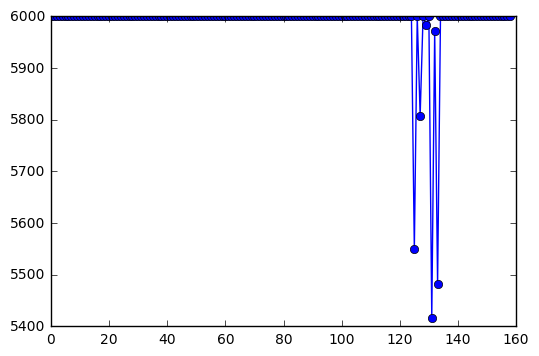

In [60]:
plt.plot(len_MD,marker='o')

In [26]:
# tica + projection
tica_obj = coor.tica(inp, lag=100, dim=2, kinetic_map=True, stride=20) #project on two dimentions
Y = tica_obj.get_output()
# clustering
cl = coor.cluster_kmeans(data=Y, k=100, stride=10)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]   #projection 1
cc_y = cl.clustercenters[:,1]   #projection 2
# plotting
z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]] #boundary

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


09-06-17 13:04:22 pyemma.coordinates.clustering.kmeans.KmeansClustering[10] INFO     Cluster centers converged after 7 steps.


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
/sc/orga/projects/filizm02a/general/software/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log


In [14]:
# tica + projection
tica_obj = coor.tica(inp, lag=100, dim=2, kinetic_map=True, stride=20) #project on two dimentions
X = tica_obj.get_output()

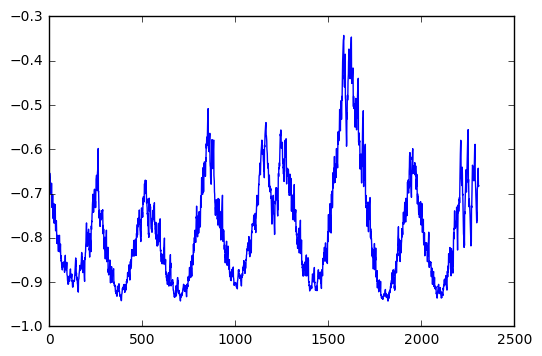

In [15]:
## Instantaneous correlation matrix between mean-free input features and TICs
plt.plot(tica_obj.feature_TIC_correlation[:,0])

In [14]:
from utils2 import *
## set directories
MORstate='inactive'
dir = "/sc/orga/projects/filizm02a/work/ion_MOR/"+MORstate
dir_US = dir + '/umbrella_sampling/'
dir_US_cv = dir_US + '/cv_z_Nwater/'
dir_MD = dir + '/unbiased_sampling/'
dir_MD_cv = dir_MD + '/cv_z_Nwater/'
## how long are the trajectories?
## with no striding, 1 frame = 2 ps 
timestep = 2./1000 # in ns

(US_traj, meta_info,  MD_traj, US_len, MD_len) = load_data_cv_only(
    187, 159,
    dir_US_cv,  u'/um-all-%d.dat',
    dir_MD_cv, u'/full-%d.dat')

Read 187 traj for US runs from /sc/orga/projects/filizm02a/work/ion_MOR/inactive/umbrella_sampling//cv_z_Nwater/
Read 159 traj for MD runs from /sc/orga/projects/filizm02a/work/ion_MOR/inactive/unbiased_sampling//cv_z_Nwater/


In [32]:
cv_z = np.concatenate(MD_traj)
cv_tica =np.concatenate(X)[:,0]
#plt.plot(X[0][:,0],MD_traj[0])

(<matplotlib.figure.Figure at 0x7f73652f80d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f73652d0190>)

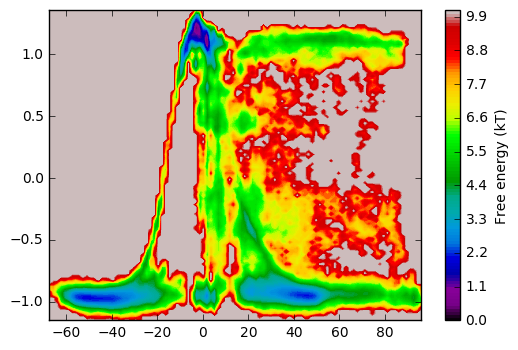

In [33]:
pyemma.plots.plot_free_energy(cv_z,cv_tica)

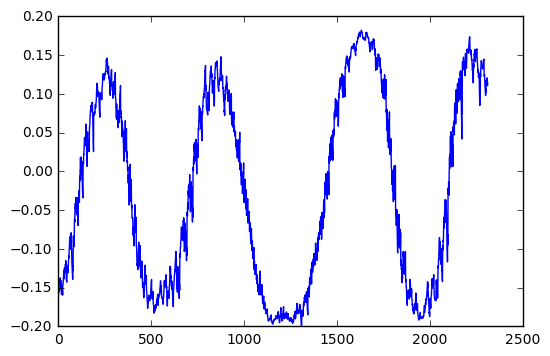

In [16]:
plt.plot(tica_obj.feature_TIC_correlation[:,1])

In [131]:
tica_obj.feature_TIC_correlation

array([[-0.65406168,  0.09197553],
       [-0.66391396,  0.0862975 ],
       [-0.65269207,  0.08598196],
       ..., 
       [-0.54987899, -0.29843605],
       [-0.5405135 , -0.29514792],
       [-0.53459943, -0.30175941]])

In [127]:
correlationtica_obj.feature_TIC_correlation[:,0]

array([-0.65406168, -0.66391396, -0.65269207, ..., -0.54987899,
       -0.5405135 , -0.53459943])

In [173]:
distlist=feat_Ca.describe()
distfile=open('dist.txt','w')
for item in distlist:
    distfile.write("%s\n" % item)

AttributeError: 'str' object has no attribute 'read'

In [180]:

np.savetxt('correlation_TIC',tica_obj.feature_TIC_correlation[:,0])


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [140]:
correlation_dis_TIC[:2310]

array([['DIST: MET 65 N 0 - SOD 1 SOD 2310', '-0.654061680511'],
       ['DIST: MET 65 CA 1 - SOD 1 SOD 2310', '-0.663913959481'],
       ['DIST: MET 65 CB 2 - SOD 1 SOD 2310', '-0.652692071451'],
       ..., 
       ['DIST: CYS 351 C 2307 - SOD 1 SOD 2310', '-0.549878988542'],
       ['DIST: CYS 351 O 2308 - SOD 1 SOD 2310', '-0.540513497336'],
       ['DIST: CYS 351 OXT 2309 - SOD 1 SOD 2310', '-0.534599433892']], 
      dtype='|S39')

In [156]:
np.savetxt('correlation_dis_TIC.dat',correlation_dis_TIC[:2310])

TypeError: Mismatch between array dtype ('|S39') and format specifier ('%.18e %.18e')

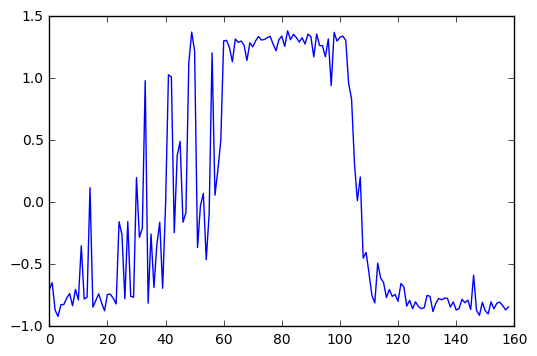

In [18]:
plt.plot([[X[i][384][0]] for i in range(159)])

In [38]:
import pickle
pickle.dump(X, open("tica_dist_out.pck","wb"))

In [15]:
import pickle
M = pickle.load(open("tica_dist_out.pck","rb"))

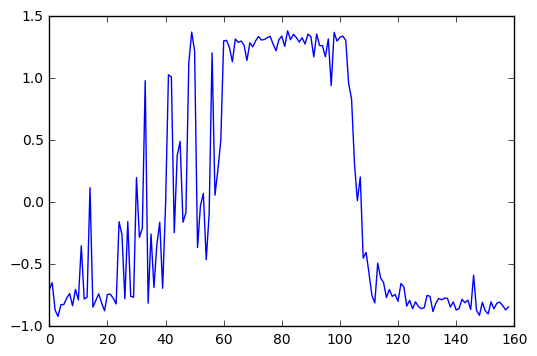

In [41]:
plt.plot([[M[i][384][0]] for i in range(159)])

In [93]:
cl = coor.cluster_kmeans(data=X, k=200, stride=10, max_iter=100000000)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]   #projection 1
cc_y = cl.clustercenters[:,1]   #projection 2


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


09-06-17 18:06:51 pyemma.coordinates.clustering.kmeans.KmeansClustering[31] INFO     Cluster centers converged after 9 steps.


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [45]:
XX = [[X[i][:,0]] for i in range(159)]
YY = [[X[i][:,1]] for i in range(159)]

In [48]:
XX

[[array([-0.67951697, -0.68073195, -0.7025643 , ..., -0.83455086,
         -0.83982235, -0.84669256], dtype=float32)],
 [array([-0.69895017, -0.71305215, -0.72752738, ..., -0.74078983,
         -0.71954858, -0.73042542], dtype=float32)],
 [array([-0.69509631, -0.656376  , -0.69162244, ..., -0.80118114,
         -0.80950516, -0.85245174], dtype=float32)],
 [array([-0.69598055, -0.70609027, -0.67872149, ..., -0.8292889 ,
         -0.86803472, -0.85705465], dtype=float32)],
 [array([-0.68515629, -0.72175074, -0.73868328, ..., -0.65239412,
         -0.60533142, -0.61013269], dtype=float32)],
 [array([-0.67120075, -0.66444761, -0.6363278 , ..., -0.85217649,
         -0.94533741, -0.92735201], dtype=float32)],
 [array([-0.64299244, -0.59336668, -0.58436948, ..., -0.8179059 ,
         -0.82215852, -0.82055598], dtype=float32)],
 [array([-0.63544816, -0.59837902, -0.64267945, ..., -0.86140996,
         -0.89008796, -0.83730543], dtype=float32)],
 [array([-0.61604106, -0.63455427, -0.63089347, 

In [94]:
# plotting
z,x,y = np.histogram2d(X[150][:,0],X[150][:,1], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]] #boundary

/sc/orga/projects/filizm02a/general/software/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


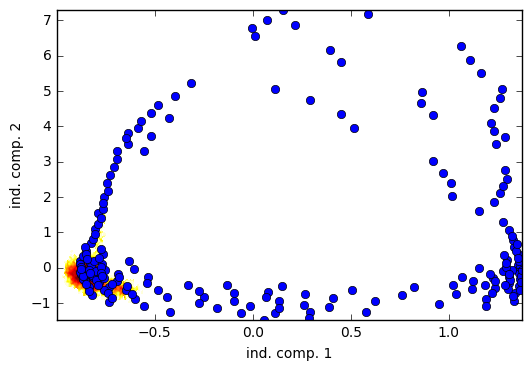

In [95]:
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plt.plot(cc_x,cc_y, linewidth=0, marker='o')
plt.xlabel('ind. comp. 1')
plt.ylabel('ind. comp. 2')

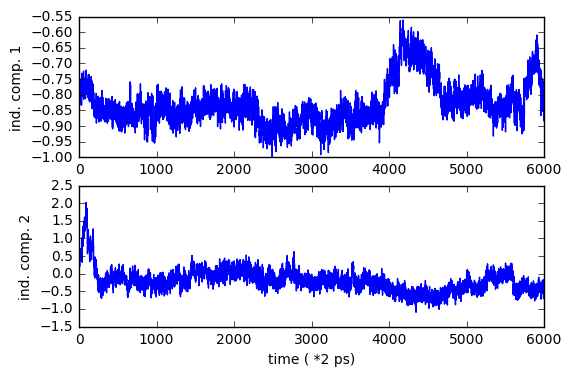

In [96]:
plt.subplot2grid((2, 1), (0, 0))
plt.plot(X[150][:, 0])
plt.ylabel('ind. comp. 1')
plt.subplot2grid((2, 1), (1, 0))
plt.plot(X[150][:, 1])
plt.ylabel('ind. comp. 2')
plt.xlabel('time ( *2 ps)')

## MSM estimation

In [97]:
import pyemma.msm as msm
import pyemma.plots as mplt

In [98]:
lags = [1,10,50,100,200,400,500,700,1000]
its = msm.its(dtrajs, lags=lags)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


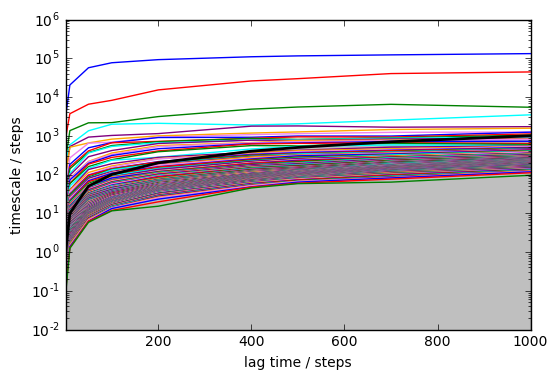

In [99]:
mplt.plot_implied_timescales(its)

In [100]:
its = msm.its(dtrajs, lags=lags, nits=10, errors='bayes', nsamples=100)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installe

(0, 1000)

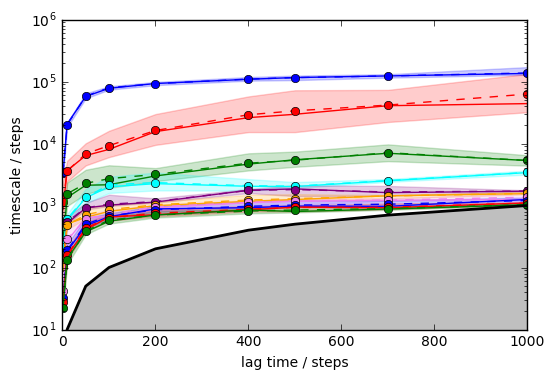

In [101]:
mplt.plot_implied_timescales(its)
plt.ylim(10,1000000)
plt.xlim(0,1000)

## final MSM

In [102]:
M = msm.estimate_markov_model(dtrajs, 700)

(-0.5, 10.5)

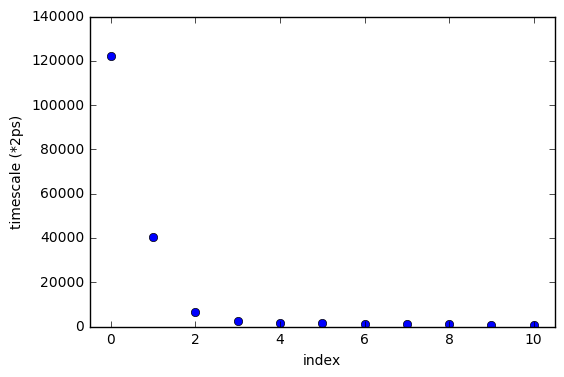

In [103]:
plt.plot(M.timescales(),linewidth=0,marker='o')
plt.xlabel('index'); plt.ylabel('timescale (*2ps)'); plt.xlim(-0.5,10.5)

In [104]:
M.timescales

<bound method MaximumLikelihoodMSM.timescales of MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=700, maxerr=1e-08, maxiter=1000000,
           reversible=True, sparse=False, statdist_constraint=None)>

(-0.5, 10.5)

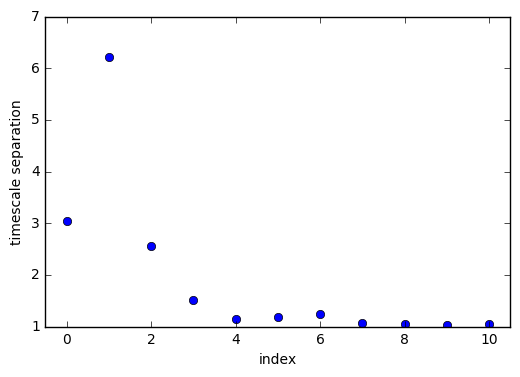

In [105]:
plt.plot(M.timescales()[:-1]/M.timescales()[1:], linewidth=0,marker='o')
plt.xlabel('index'); plt.ylabel('timescale separation'); plt.xlim(-0.5,10.5)

In [112]:
r2

array([ 0.52990401, -1.94941564,  0.53961243,  0.53493637, -1.83378721,
       -0.32479606, -1.9833257 , -3.09267596,  0.53520087,  0.53276517,
       -3.12377844,  0.53635102, -3.05731053, -1.8983524 , -1.93462462,
        0.53807036,  0.50823197,  0.53061578, -1.95924443,  0.53848872,
        0.53599909, -1.9237943 ,  0.03031407, -0.82204164, -1.96805572,
        0.53505545, -1.81349792,  0.52993497, -2.85734722, -0.60612845,
        0.53423498, -3.15453161,  0.43037434,  0.49316738,  0.43265294,
       -1.9218785 , -1.97231548,  0.5348455 ,  0.53343963,  0.53441986,
       -3.08927784,  0.47814629, -2.34748987,  0.4833266 , -1.88286027,
       -0.40863891, -1.78865559, -1.67502912,  0.53780063, -1.9820566 ,
       -0.73556292,  0.54355053, -2.08676762,  0.5326893 ,  0.53420723,
       -3.04284711, -2.06354233, -3.1044054 , -1.93325971,  0.50114756,
        0.11470887,  0.50857349, -1.91361442,  0.54029187, -2.97215265,
        0.23782347, -1.9140333 ,  0.53469641,  0.53517437, -1.89

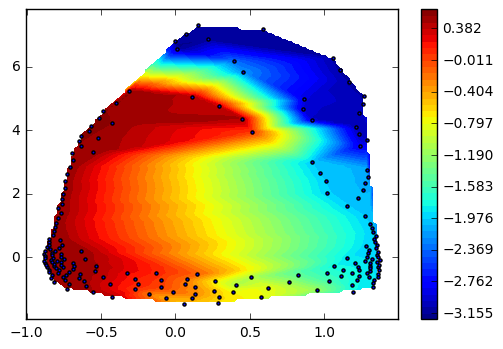

In [107]:
r2 = M.eigenvectors_right()[:,1]
ax = mplt.scatter_contour(cc_x, cc_y, r2)

In [108]:
len(r2)

200

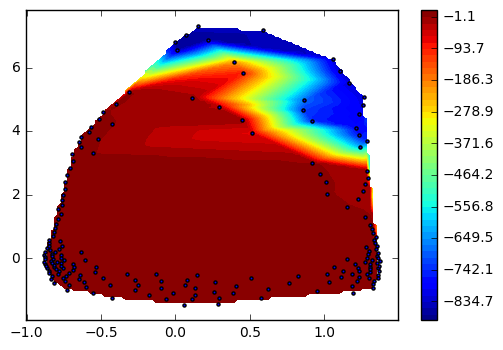

In [109]:
r3 = M.eigenvectors_right()[:,2]
mplt.scatter_contour(cc_x, cc_y, r3)

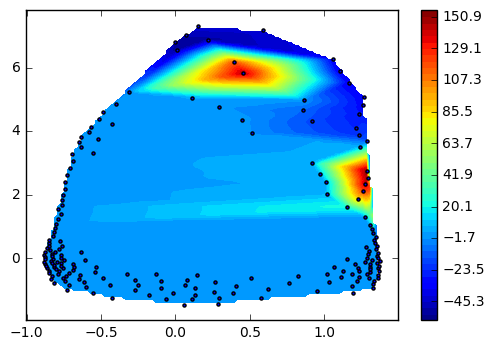

In [110]:
r4 = M.eigenvectors_right()[:,3]
mplt.scatter_contour(cc_x, cc_y, r4)

In [5]:
import itertools
contact_from_pdb = [104, 110, 111, 113, 114, 117, 120, 124, 127, 128, 131, 143, 144, 147, 150, 151, 154, 155, 176, 177, 180, 207, 208, 209, 211, 214, 216, 217, 218, 219, 220, 221, 225, 226, 229, 230, 240, 278, 281, 285, 289, 293, 305, 307, 310, 311, 315, 318, 319, 325, 326, 328, 332, 336, 340, 342, 343]
# PyEMMA count the residue number from 0.So residue 100 in Pyemma should be residue index 35, but the output from pyemma will still be residue 100
contact_for_pyemma = [x-65 for x in contact_from_pdb]
contact = list(itertools.combinations(contact_for_pyemma,2))

In [6]:
contact_prot = np.array(contact)

In [7]:
feat1 = coor.featurizer(topfile)
feat1.add_residue_mindist(contact_prot)

In [8]:
feat1.describe()

['RES_DIST (closest-heavy) ASN40 - LEU46',
 'RES_DIST (closest-heavy) ASN40 - ALA47',
 'RES_DIST (closest-heavy) ASN40 - ALA49',
 'RES_DIST (closest-heavy) ASN40 - ASP50',
 'RES_DIST (closest-heavy) ASN40 - ALA53',
 'RES_DIST (closest-heavy) ASN40 - THR56',
 'RES_DIST (closest-heavy) ASN40 - GLN60',
 'RES_DIST (closest-heavy) ASN40 - ASN63',
 'RES_DIST (closest-heavy) ASN40 - TYR64',
 'RES_DIST (closest-heavy) ASN40 - GLY67',
 'RES_DIST (closest-heavy) ASN40 - VAL79',
 'RES_DIST (closest-heavy) ASN40 - ILE80',
 'RES_DIST (closest-heavy) ASN40 - ASP83',
 'RES_DIST (closest-heavy) ASN40 - ASN86',
 'RES_DIST (closest-heavy) ASN40 - MET87',
 'RES_DIST (closest-heavy) ASN40 - SER90',
 'RES_DIST (closest-heavy) ASN40 - ILE91',
 'RES_DIST (closest-heavy) ASN40 - LEU112',
 'RES_DIST (closest-heavy) ASN40 - ASP113',
 'RES_DIST (closest-heavy) ASN40 - THR116',
 'RES_DIST (closest-heavy) ASN40 - THR143',
 'RES_DIST (closest-heavy) ASN40 - THR144',
 'RES_DIST (closest-heavy) ASN40 - LYS145',
 'RES

In [9]:
input_contact = coor.source(traj_list,features=feat1)
print('number of trajectories = ',input_contact.number_of_trajectories())
print('trajectory length = ',input_contact.trajectory_length(0))
print('number of dimension = ',input_contact.dimension())

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


('number of trajectories = ', 159)
('trajectory length = ', 6000)
('number of dimension = ', 1596)


In [ ]:
md_cvs_contact = input_contact.get_output()

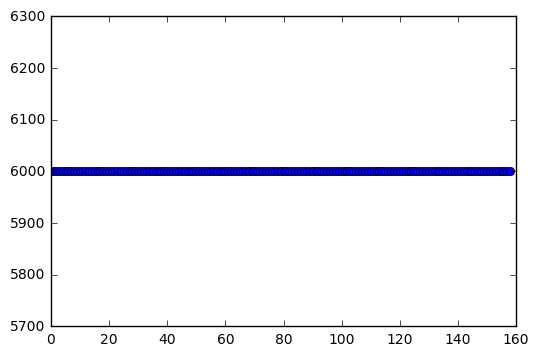

In [10]:
len_MD_contact = [input_contact.trajectory_length(i) for i in range(159)]
plt.plot(len_MD_contact,marker='o')

In [11]:
# tica + projection
tica_contact_obj = coor.tica(input_contact, lag=100, dim=2, kinetic_map=True, stride=20) #project on two dimentions
Y = tica_contact_obj.get_output()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


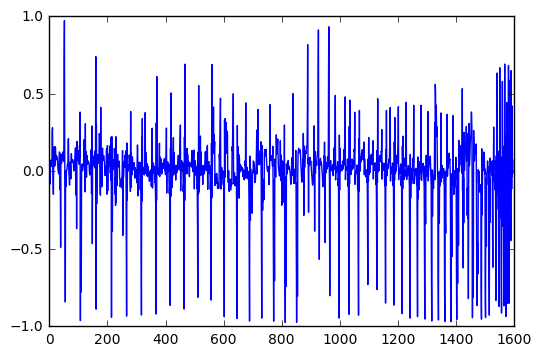

In [12]:
## Instantaneous correlation matrix between mean-free input features and TICs
plt.plot(tica_contact_obj.feature_TIC_correlation[:,0])

(<matplotlib.figure.Figure at 0x7f95431dbed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f95431db6d0>)

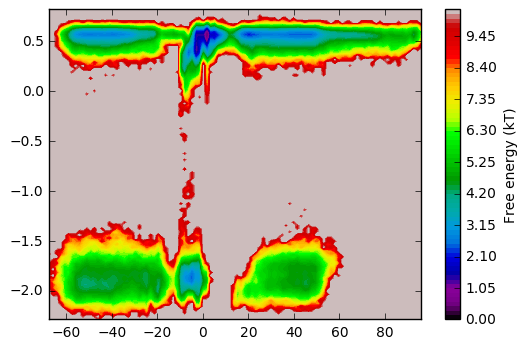

In [15]:
cv_z = np.concatenate(MD_traj)
cv_tica_contact =np.concatenate(Y)[:,0]
#plt.plot(X[0][:,0],MD_traj[0])
pyemma.plots.plot_free_energy(cv_z,cv_tica_contact)

(<matplotlib.figure.Figure at 0x7f95428e2650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9542c41c50>)

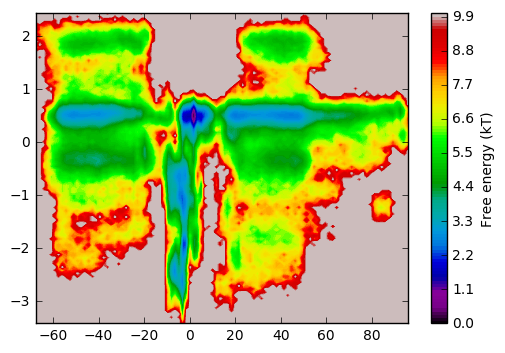

In [20]:
cv_z = np.concatenate(MD_traj)
cv_tica_contact =np.concatenate(Y)[:,1]
#plt.plot(X[0][:,0],MD_traj[0])
pyemma.plots.plot_free_energy(cv_z,cv_tica_contact)

In [19]:
contact_list=feat1.describe()
contact_file=open('inact_contact.txt','w')
for item in contact_list:
    contact_file.write("%s\n" % item)

In [18]:
np.savetxt('inact_contact_TIC',tica_contact_obj.feature_TIC_correlation[:,0])